# Comparison of imdb_dataset with different types of Layers after Embedding Layer

### Here, we compare :
#### 1. Gated Recurrent Units(GRU)
#### 2. Long short-term memory (LSTM)
#### 3. Convolutional Layer

In [1]:
import tensorflow as tf
print(tf.__version__)

# !pip install -q tensorflow-datasets

2.2.0-rc3


In [0]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)


In [0]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [0]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)


In [5]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

? ? ? ? ? ? ? b'i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the <OOV> and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant constantly slow and boring things seemed to happen but with no explanation of what was causing them or why i admit i may have missed part of the film but i watched the majority of it and everything just seemed to happen of its own <OOV> without any real concern for anything else i cant recommend this film at all '
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of 

First, we will test out using Gated Recurrent Units(GRU) bidirectional Layer after the embedding Layer.

In [6]:
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_gru.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9600      
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [7]:
num_epochs = 10
history = model_gru.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 17s 22ms/step - loss: 0.4978 - accuracy: 0.7300 - val_loss: 0.3500 - val_accuracy: 0.8463
Epoch 2/10
782/782 [==============================] - 16s 20ms/step - loss: 0.2923 - accuracy: 0.8811 - val_loss: 0.3666 - val_accuracy: 0.8374
Epoch 3/10
782/782 [==============================] - 16s 21ms/step - loss: 0.2280 - accuracy: 0.9118 - val_loss: 0.3881 - val_accuracy: 0.8373
Epoch 4/10
782/782 [==============================] - 16s 20ms/step - loss: 0.1807 - accuracy: 0.9323 - val_loss: 0.4202 - val_accuracy: 0.8294
Epoch 5/10
782/782 [==============================] - 16s 20ms/step - loss: 0.1354 - accuracy: 0.9515 - val_loss: 0.4989 - val_accuracy: 0.8244
Epoch 6/10
782/782 [==============================] - 16s 20ms/step - loss: 0.0936 - accuracy: 0.9683 - val_loss: 0.5298 - val_accuracy: 0.8228
Epoch 7/10
782/782 [==============================] - 16s 21ms/step - loss: 0.0637 - accuracy: 0.9776 - val_loss: 0.6262 - val_accuracy:

As you can see, the training accuracy is 99.36% while validation accuarcy is 81.82% on 10 epochs. The graph shows possible overfitting.

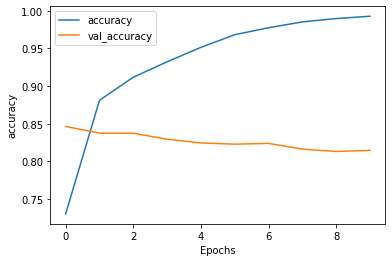

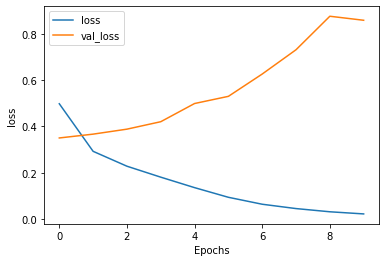

In [8]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

Next, we try out Long short-term memory (LSTM).

In [9]:
# Model Definition with LSTM
model_ltsm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_ltsm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_ltsm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


In [10]:
num_epochs = 10
history_ltsm = model_ltsm.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 18s 23ms/step - loss: 0.5173 - accuracy: 0.7327 - val_loss: 0.3658 - val_accuracy: 0.8448
Epoch 2/10
782/782 [==============================] - 17s 22ms/step - loss: 0.3067 - accuracy: 0.8731 - val_loss: 0.3583 - val_accuracy: 0.8397
Epoch 3/10
782/782 [==============================] - 17s 22ms/step - loss: 0.2392 - accuracy: 0.9076 - val_loss: 0.3788 - val_accuracy: 0.8379
Epoch 4/10
782/782 [==============================] - 17s 22ms/step - loss: 0.1893 - accuracy: 0.9293 - val_loss: 0.4417 - val_accuracy: 0.8256
Epoch 5/10
782/782 [==============================] - 17s 22ms/step - loss: 0.1481 - accuracy: 0.9481 - val_loss: 0.4967 - val_accuracy: 0.8266
Epoch 6/10
782/782 [==============================] - 17s 22ms/step - loss: 0.1044 - accuracy: 0.9642 - val_loss: 0.5683 - val_accuracy: 0.8250
Epoch 7/10
782/782 [==============================] - 17s 22ms/step - loss: 0.0814 - accuracy: 0.9724 - val_loss: 0.5909 - val_accuracy:

As you can see, the training accuracy is 98.61% while validation accuarcy is 80.94% on 10 epochs. The loss is also slightly more here.

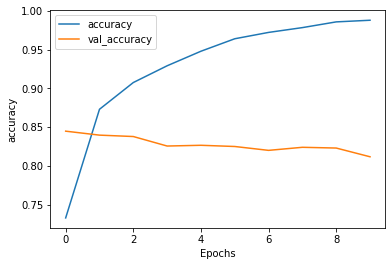

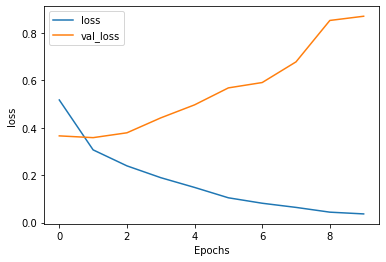

In [11]:
plot_graphs(history_ltsm, 'accuracy')
plot_graphs(history_ltsm, 'loss')

Lastly, we have Convolutional Layer to check

In [12]:
# Model Definition with Conv1D
model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_conv.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_conv.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 774       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
_________________________________________________________________


In [13]:
num_epochs = 10
history_conv = model_conv.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 7s 9ms/step - loss: 0.4338 - accuracy: 0.7921 - val_loss: 0.3494 - val_accuracy: 0.8458
Epoch 2/10
782/782 [==============================] - 7s 8ms/step - loss: 0.2798 - accuracy: 0.8847 - val_loss: 0.3558 - val_accuracy: 0.8453
Epoch 3/10
782/782 [==============================] - 7s 8ms/step - loss: 0.2273 - accuracy: 0.9117 - val_loss: 0.3875 - val_accuracy: 0.8342
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 0.1891 - accuracy: 0.9287 - val_loss: 0.4201 - val_accuracy: 0.8314
Epoch 5/10
782/782 [==============================] - 7s 9ms/step - loss: 0.1525 - accuracy: 0.9472 - val_loss: 0.4600 - val_accuracy: 0.8261
Epoch 6/10
782/782 [==============================] - 7s 9ms/step - loss: 0.1249 - accuracy: 0.9596 - val_loss: 0.5263 - val_accuracy: 0.8182
Epoch 7/10
782/782 [==============================] - 7s 8ms/step - loss: 0.0988 - accuracy: 0.9705 - val_loss: 0.6055 - val_accuracy: 0.8161
Epoch 

As you can see, the training accuracy is 98.71% while validation accuarcy is 80.09% on 10 epochs. The loss is slightly less here.

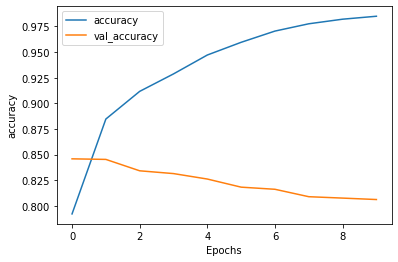

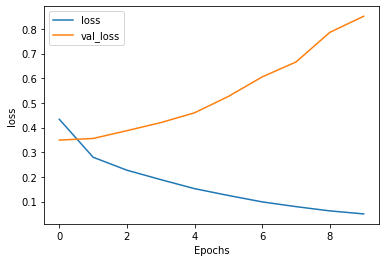

In [14]:
plot_graphs(history_conv, 'accuracy')
plot_graphs(history_conv, 'loss')